# Neural networks
## Image recognition

The goal of this exercise is to build a neural network that is trained in recoginizing the pattern in this image
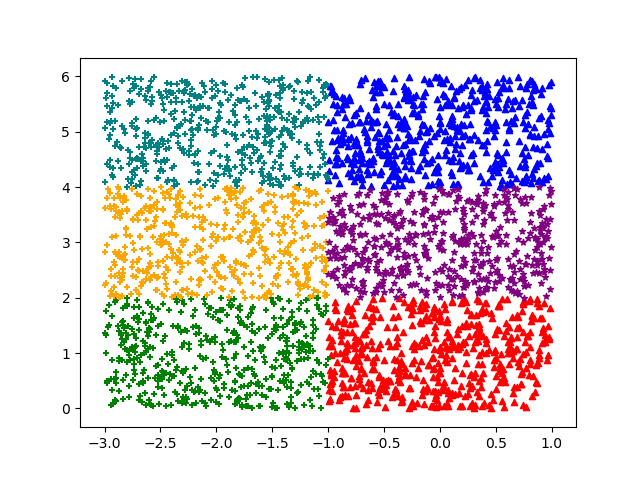
<p>Inside the frame there is a collection of symbols. Each symbol has two properities
<ol>
    <li> The color of the symbol, and </li>
    <li> the marker of the symbol, one of triangle, cross, or a star</li>
</ol>
Additionally, each symbol has a location inside the image, quantified by the X and Y axis coordinates of the symbol inside the frame    </p>
<p>The aim is to build a model that predicts the symbol color and marker based on its location.<br/>
Therefore, the location, based on its X and Y coordianates will be the independent variable, while the symbol color and marker will be the dependent variable<br/>We, therefore, have two independent variables, and two dependent variables</p>


## load the training data into a dataframe

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
train_df

,x,y,color,marker
0,-0.765775,1.006452,red,^
1,0.229016,0.094320,red,^
2,0.189987,1.589141,red,^
3,0.580085,0.520488,red,^
4,0.292287,0.317852,red,^
...,...,...,...,...
5995,0.795819,2.726449,purple,*
5996,-0.362444,3.184180,purple,*
5997,0.638764,2.520736,purple,*
5998,0.845822,3.345033,purple,*


## The dataframe has output columns, color and marker, both of which have categorical values
### Convert the color column into a set of 0/1 values using one hot encoding

In [2]:
one_hot_color = pd.get_dummies(train_df.color)
one_hot_color

,blue,green,orange,purple,red,teal
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
5995,0,0,0,1,0,0
5996,0,0,0,1,0,0
5997,0,0,0,1,0,0
5998,0,0,0,1,0,0


### and convert the marker column into a set of 0/1 values using one hot encoding

In [3]:
one_hot_marker = pd.get_dummies(train_df.marker)
one_hot_marker

,*,+,^
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
5995,1,0,0
5996,1,0,0
5997,1,0,0
5998,1,0,0


### a list of color columns will be useful later

In [4]:
colorList = one_hot_color.columns.to_list()
colorList

['blue', 'green', 'orange', 'purple', 'red', 'teal']

### as will a list of marker columns

In [5]:
markerList = one_hot_marker.columns.to_list()
markerList

['*', '+', '^']

### the values of property of a Dataframe object converts it into a Numpy array

In [6]:
one_hot_marker.values

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

### concatenate the color encoding array to the marker encoding
#### now we have an array with 9 columns
The first 6 correspond to the 6 unique colors,<br/>
and the last three to the markers
### this will be our dependent variable,
### or the rightmost column of our network

In [7]:
labels = np.concatenate((one_hot_color.values, one_hot_marker.values), axis=1)
print ('Labels shape = ', labels.shape)
labels[:5,:]

Labels shape =  (6000, 9)


array([[0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1]], dtype=uint8)

### Stack the X and Y columns of the dataframe into a numpy array
#### This will be our independent variable,
#### or the leftmost column of our network

In [8]:
locations = np.column_stack((train_df.x.values, train_df.y.values))
locations

array([[-0.76577519,  1.00645248],
       [ 0.22901613,  0.09432024],
       [ 0.18998664,  1.58914128],
       ...,
       [ 0.63876363,  2.52073645],
       [ 0.84582167,  3.3450328 ],
       [ 0.18387897,  2.07556042]])

### give these boys a good shuffle

In [9]:
np.random.RandomState(seed=42).shuffle(locations)
print('locations:\n',locations[:5,:])
np.random.RandomState(seed=42).shuffle(labels)
print('colors & markers:\n', labels[:5,:])

locations:
 [[ 0.86685068  5.96820151]
 [-2.34892292  4.9918649 ]
 [-0.27430203  0.08683008]
 [-2.85017287  1.00435546]
 [ 0.00676284  3.80837838]]
colors & markers:
 [[1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 1 0 0]]


### and lets build our network
#### it will actually have five layers
<ol>
    <li>The input layer, which has two nodes</li>
    <li>3 internal layers,</li>
    <li>and the output layer, which must have 9 nodes, the total number of encoded values</li>
</ol>

In [10]:
model = keras.Sequential([
#	keras.layers.Dense(120, input_shape=(2,), activation='relu'),
	keras.layers.Dense(90, activation='relu'),
	keras.layers.Dense(30, activation='relu'),
	keras.layers.Dense(9, activation='sigmoid')])

model.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['accuracy'])

model.fit(locations, labels, batch_size=4, epochs=10)



Train on 6000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 810us/sample - loss: 0.6725 - accuracy: 0.8527
Epoch 2/10
6000/6000 [==============================] - 4s 663us/sample - loss: 0.6566 - accuracy: 0.8780
Epoch 3/10
6000/6000 [==============================] - 4s 674us/sample - loss: 0.6548 - accuracy: 0.8822
Epoch 4/10
6000/6000 [==============================] - 6s 997us/sample - loss: 0.6540 - accuracy: 0.8830
Epoch 5/10
6000/6000 [==============================] - 5s 888us/sample - loss: 0.6534 - accuracy: 0.8847
Epoch 6/10
6000/6000 [==============================] - 5s 894us/sample - loss: 0.6532 - accuracy: 0.8849
Epoch 7/10
6000/6000 [==============================] - 7s 1ms/sample - loss: 0.6494 - accuracy: 0.8961
Epoch 8/10
6000/6000 [==============================] - 4s 622us/sample - loss: 0.6419 - accuracy: 0.9189
Epoch 9/10
6000/6000 [==============================] - 4s 616us/sample - loss: 0.6367 - accuracy: 0.9324
Epoch 10/10
6000/6000 [===

### and lets test it on the test dataset

In [11]:
test_df = pd.read_csv('test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))

test_one_hot_color = pd.get_dummies(test_df.color).values
test_one_hot_marker = pd.get_dummies(test_df.marker).values

test_labels = np.concatenate((test_one_hot_color, test_one_hot_marker), axis=1)

print("EVALUATION")
model.evaluate(test_x, test_labels)


EVALUATION
1200/1200 [==============================] - 0s 250us/sample - loss: 0.6353 - accuracy: 0.9335


[0.6353247706095377, 0.93351847]

### let try it to predict three outcomes

In [12]:
purpleStars = [0,3]
redTriangles = [0,1]
greenCrosses = [-2,1]
predictionIndices = ['purple stars', 'red triangles', 'green crosses']
predictionsCases = np.array([purpleStars, redTriangles, greenCrosses])
prediction = np.round(model.predict(predictionsCases))
print("Prediction", prediction)

Prediction [[0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]]


### lets make these predictions readable

In [13]:
for rows in range(0,prediction.shape[0]):
    c = '?'
    m = '?'
    for colors in range (0,6):
        if prediction[rows, colors] == 1:
            c = colorList[colors]
    for markers in range(6,9):
        if prediction[rows,markers] == 1:
            m = markerList[markers-6]
    print (predictionIndices[rows], '\t', c, m)

purple stars 	 purple *
red triangles 	 red ^
green crosses 	 green +


### and even a bit more readalbe

In [14]:
predHeaders = colorList + markerList
predictionDf = pd.DataFrame(prediction, columns = predHeaders, index = predictionIndices )
predictionDf

,blue,green,orange,purple,red,teal,*,+,^
purple stars,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
red triangles,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
green crosses,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
********************* 
*********************

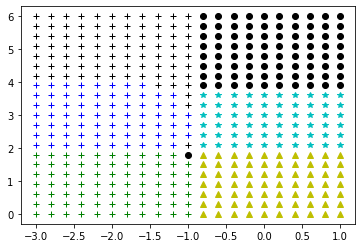

In [19]:
import matplotlib.pyplot as plt
for x in range(-30,11,2):
    print (' ')
    for y in range(0,61,3):
        xx = x/10
        yy = y/10
        prediction = np.round(model.predict([[xx,yy]]))
        print ('*', end='')
        #print (xx, yy)
        clist = ['r', 'g', 'b', 'c', 'y', 'm']
        mlist = ['*', '+', '^']
        c = 'k'
        m = 'o'
        for colors in range (0,6):
            if prediction[0,colors] == 1:
                c =  clist[colors]
        for markers in range(6,9):
            if prediction[0,markers] == 1:
                m = mlist[markers-6]
        mark = c + ' ' + m
        #print (c,m)
        #print(mark)       
        plt.plot(xx, yy, mark)
plt.show()

In [23]:
prediction = np.round(model.predict([[0,5]]))
print("Prediction", prediction)

Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
